# Creating Ranges of Values in Python

**by Michael Burkhardt (mburkhardt@smu.edu)**

_Last updated: February 17, 2016_

As I grope around, trying to find my way around Python, Jupyter notebooks, Scipy, Numpy, (and on and on) I'm learning a great deal. Unfortunately, sometimes the simple things are the most elusive, espcially in the early going. In this notebook, I'm collecting some of the many ways I've found (so far) to generate ranges of numbers in a variety of contexts. I'll start with “vanilla” Python, then move on to numpy. I may add more stuff as time goes on...

## 1. Native Python

### 1.1 List of repeated values using the * operator
This is probably the simplest way of generating a list of repeated values.

In [1]:
# Generate a list containing 11 elements, all having the same value (7).
x = [7] * 11
print type(x)
print x
print x[0]

# Clean up
del x

<type 'list'>
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
7


### 1.2 Using the range() function

    range( [start], stop [, step] )

The range function returns a list of integers of the half-open interval **[start,stop)**.

In [2]:
# Generate a list of integer values over a range. In this case, from 1 to 9:
x = range(10)
print type(x)
print x
print x[1]

# Clean up
del x

<type 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1


In [3]:
# Here's another example, in which start and step are also specified:
x = range(9,18,3)
print x

# Clean up
del x

[9, 12, 15]


In [4]:
x = [(1,2),(3,4),(4,5)]
print x

# Clean up
del x

[(1, 2), (3, 4), (4, 5)]


## 2. Ranges using Numpy
First, a bit about Numpy arrays, which are a different type (**numpy.ndarray**) from standard Python lists, but otherwise behave just like ordinary Python arrays. For more about the differences, [read this](http://stackoverflow.com/questions/993984/why-numpy-instead-of-python-lists). Why is this important? Because numpy functions for generating ranges of values return numpy ndarray objects, not Python lists.

In [5]:
# First load the numpy library
import numpy as np

### 2.0 An introduction to Numpy arrays

In [6]:
# A simple numpy ndarray looks and tastes like a regular Python list.
x = np.array([1, 2, 3], int)
print type(x)
print x
print x[1]

# Clean up
del x

<type 'numpy.ndarray'>
[1 2 3]
2


In [7]:
# You can also create a numpy array from an existing Python list:
x = range(1,10)
y = np.asarray(x)

print type(y)
print y

# Clean up
del x, y

<type 'numpy.ndarray'>
[1 2 3 4 5 6 7 8 9]


### 2.1 Generate an array of all zeros

    numpy.zeros( shape, dtype=float )

Where _shape_ is a single int or a tuple specifying the size of a two-dimensional array to be generated. (Some options have been omitted for simplicity.)

In [8]:
# A simple array of floating point zeros
print np.zeros(5)

[ 0.  0.  0.  0.  0.]


In [9]:
# a two-dimensional result
print np.zeros((2,2))

[[ 0.  0.]
 [ 0.  0.]]


In [10]:
# a two-dimensional result containing integers
print np.zeros((2,2),dtype=int)

[[0 0]
 [0 0]]


There is also a way of generating an [empty](docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.empty.html) array, which may be faster for large arrays. But be careful with unititialized arrays!

### 2.2 Generate an array of ones

    numpy.ones( shape, dtype=float )

As you'd expect, this works just like **numpy.zeros()**.

In [11]:
# A simple array of floating point ones
print np.ones(5)

[ 1.  1.  1.  1.  1.]


In [12]:
# a two-dimensional result
print np.ones((2,2))

[[ 1.  1.]
 [ 1.  1.]]


In [13]:
# a two-dimensional result containing integers
print np.ones((2,2),dtype=int)

[[1 1]
 [1 1]]


### 2.3 Create a range of evenly spaced values, given step size

    numpy.arange([start,] stop, [step,] [dtype=None])

The **numpy.arange** function returns an array of evenly spaced values within a specified interval. The returned values are on the **half-open** interval [start,stop). An optional _step_ value can also be specified.

In [14]:
# A simple example: integers from 0 to 5:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [15]:
# integers 1 to 5:
np.arange(1,6)

array([1, 2, 3, 4, 5])

In [16]:
# floats from 1. to 5.
np.arange(1,6,dtype=float)

array([ 1.,  2.,  3.,  4.,  5.])

In [17]:
# Even numbers from 2 to 20
np.arange(2,21,2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [18]:
# Fractional steps can also be specified:
np.arange(0,10.1,0.5)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

Note: the [arange()](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.arange.html) documentation suggests using [linspace()](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html) for fractional step sizes. See below.

### 2.4 Create a range containing a specified number of evenly spaced values
    
    numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)

The major difference betweel **linspace()** and **arange()** is that the latter allows you to specify the number of steps, rather than the step size. In addition, **linspace()** gives you the option to generate results on either the half-open interval [start,stop) or the **closed** interval [start,stop].

In [19]:
# 11 data points from -1.0 to 1.0
np.linspace(-1,1,11)

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

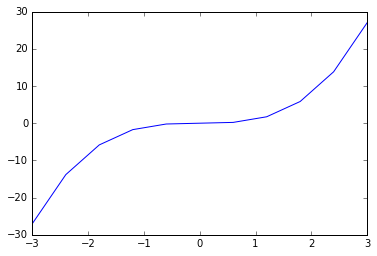

In [21]:
# A simple graph of the cube of x, using linspace()

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(-3,3,11)
y = [value ** 3 for value in x]

plt.plot(x,y)
plt.show()

I'm sure there are lots of other things that I'm missing here. As I find them, I'll try to keep this notebook updated. -_mb_